# The Question Were Trying to Solve

We are using Kaggle data about Costa Rican Household Income to predict poverty. We are using Machine Learning algorithms to predict whether someone lives in "Extreme Poverty", "Moderate Poverty", "Vulnerable Household", or "Non-Vulnerable Household".

# Import General Libraries 

In [1]:
#Here I Import General Libraries I Need
import os
from datetime import date
import pandas as pd 
import numpy as np 
import scipy as sp 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = 'darkgrid')
from pylab import rcParams
rcParams['figure.figsize'] = 25, 12.5
import matplotlib
#Matplotlib inline shows graphs right here in my jupyter notebook
%matplotlib inline

In [2]:
#Here I import a Warnings Library to Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Predictive Libraries

In [3]:
#Here I Import My Libraries for the Predictive Analysis
from sklearn import svm, tree, linear_model, neighbors, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Model validation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

#Common Model Helpers
import xgboost
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import missingno as msno

# Import All My Data, Training and Testing

In [4]:
#Here I Import the Kaggle Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Now that we read in the data we will just get a quick glimpse of the data.

In [5]:
#quickly review our data
train_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [6]:
#quickly review our data
test_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,0.990171,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,1.400000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,2.200000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,2.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,7.000000,...,97.000000,441.00000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Just a quick summary shows me I have 9557 entries with 138 variables. I see I have floats, ints, and objects. I also can see mins, maxs, and summary stats for all my variables.

In [9]:
target = train_data['Target']
target.value_counts(normalize=True)

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64

Here I also can see how my data are split up. We see that about 62 percent of the entries are type 4 - NonVulnerable, Twelve percent are type three - Moderate Poverty, 16 percent are type 2 - Vulnerable, and 7 percent are type 1 - Extreme Poverty.

# Graph The Data

Using the information I now know about my data, I will graph the relationships to get a better understanding.

In [10]:
#Create DataFrame called targetvalues to show how many are in each group
target_values = train_data['Target'].value_counts()
target_values = pd.DataFrame(target_values)
target_values['Household_type'] = target_values.index
target_values

,Target,Household_type
4,5996,4
2,1597,2
3,1209,3
1,755,1


Next we go ahead and graph this target_values dataframe.

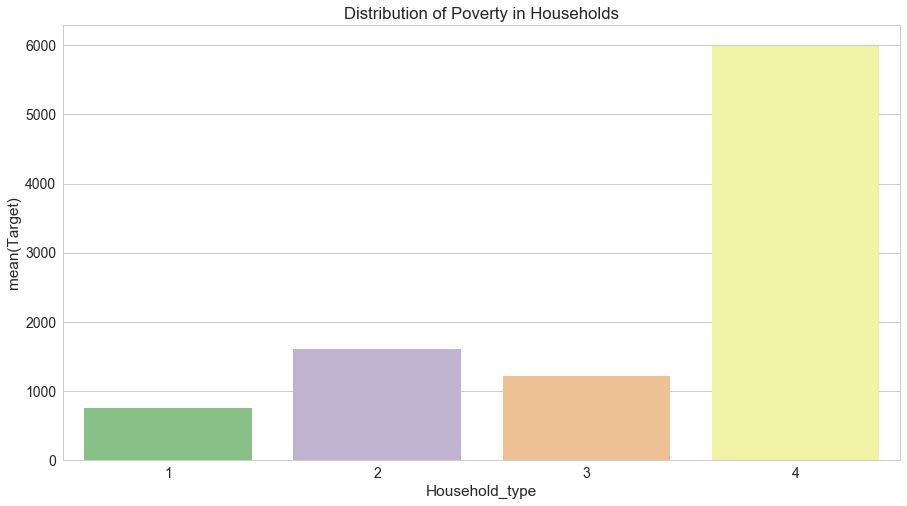

In [11]:
sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x = 'Household_type', y = 'Target', data = target_values, palette='Accent', ci = None).set_title('Distribution of Poverty in Households')

Next we are going to create a heatmap to show correlations. 

In [12]:
#Here we create a correlation dataframe (corrs)
corrs = train_data.corr().abs()
corrs1 = corrs.unstack().drop_duplicates()
strongest = corrs1.sort_values(kind="quicksort", ascending = False)
strongest1 = pd.DataFrame(strongest)
temp = strongest1.index.values
#We then loops through the rows and columns to map out which columns and rows show strongest correlations
first_cols = [i[0] for i in temp]
second_cols = [j[1] for j in temp]
total_cols_corr = list(set(first_cols[:20] + second_cols[:20]))
strongest.head(25)

v2a1             v2a1               1.000000
r4t3             tamhog             0.998107
public           coopele            0.979824
age              SQBage             0.958090
tamhog           SQBhogar_total     0.950173
r4t3             SQBhogar_total     0.948761
meaneduc         SQBmeaned          0.948003
abastaguadentro  abastaguafuera     0.946470
r4t3             tamviv             0.945243
overcrowding     SQBovercrowding    0.945094
tamhog           tamviv             0.943640
escolari         SQBescolari        0.943325
sanitario2       sanitario3         0.939439
tamviv           SQBhogar_total     0.901396
energcocinar2    energcocinar3      0.901042
hogar_nin        SQBhogar_nin       0.884141
elimbasu1        elimbasu3          0.833666
r4h2             r4h3               0.821367
r4m2             r4m3               0.820109
r4t2             r4t3               0.806381
                 hogar_adul         0.805526
pisomoscer       pisocemento        0.804205
rooms     

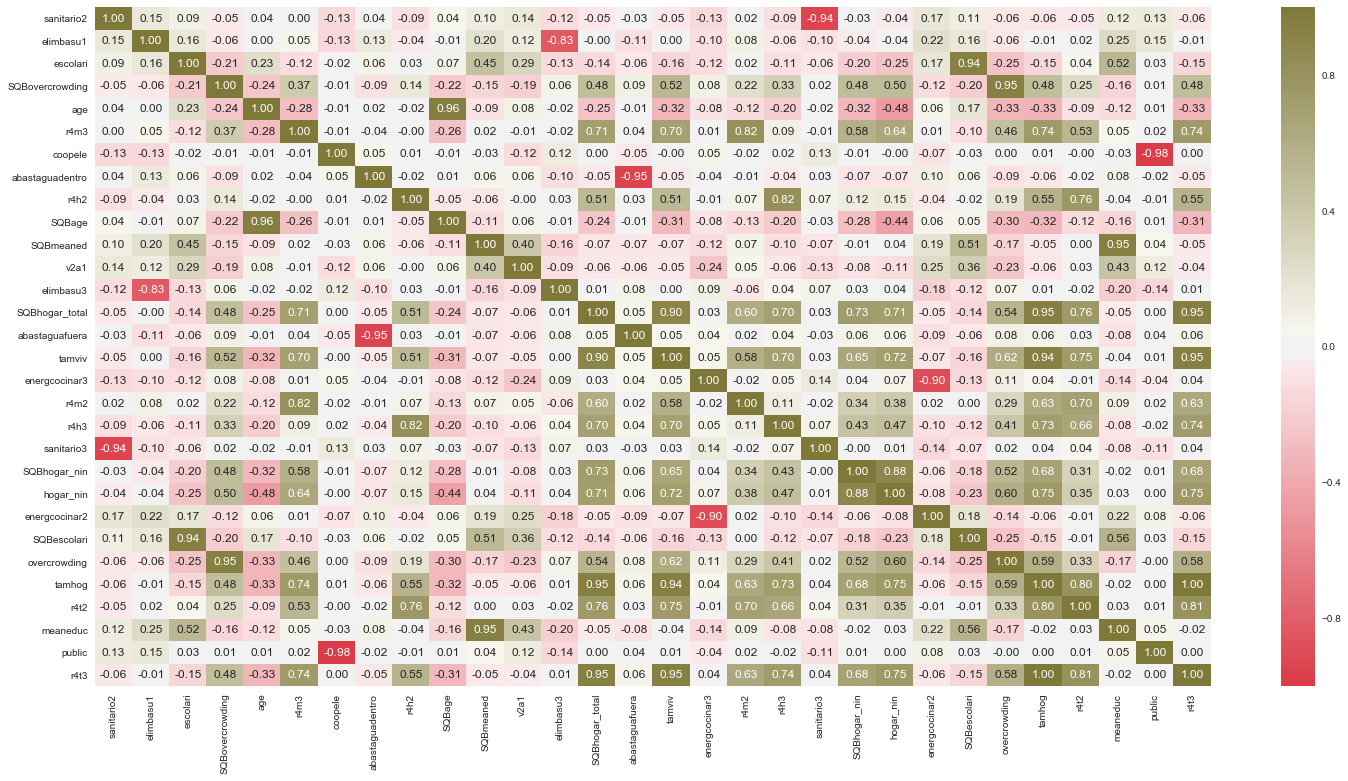

In [13]:
#Creating a similar dataframe (corr) we map out the correlations and then map out the heatmap
corr = train_data[total_cols_corr].corr()
sns.set(font_scale=1)
cmap = sns.diverging_palette(10, 80, as_cmap=True)
f, ax = plt.subplots(figsize=(25, 12.5))
sns.heatmap(corr, cmap=cmap, annot=True, ax=ax, fmt='.2f')

This heatmap has a lot going on in it. We can get a rough idea, though, about how things are correlated. 

# Data Cleaning

Here we go in and fix all out object type data. We can't use it easily so we're correcting for it now.

In [14]:
#Creating 2 arrays to hold our categorical and numerical data. 
categorical = []
numerical = []
#Here we see if its an object and if it is we put it on the end of our categorical. 
for feature in train_data.columns:
    if train_data[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)
#At the end here we check to make sure that we were successful
train_data[categorical].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [15]:
#We repeat the process for our test_data as well.
categorical = []
numerical = []
for feature in test_data.columns:
    if test_data[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)
test_data[categorical].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


In [16]:
train_data[numerical].head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,NaN,0,8,0,1,1,0,NaN,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [17]:
test_data[numerical].head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,NaN,0,5,0,1,1,0,NaN,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,NaN,0,5,0,1,1,0,NaN,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,NaN,0,5,0,1,1,0,NaN,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,NaN,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


### Next we want to check how many values are only Zeros.

In [18]:
#We add up all the zero values in our training data for each variable.
train_data[numerical].isnull().sum().sort_values(ascending = False).head()

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
dtype: int64

In [19]:
#Then we sum all the black observations for the test data.
test_data[numerical].isnull().sum().sort_values(ascending = False).head()

rez_esc      19653
v18q1        18126
v2a1         17403
meaneduc        31
SQBmeaned       31
dtype: int64

In [20]:
train_data['meaneduc'].describe()

count    9552.000000
mean        9.231523
std         4.167694
min         0.000000
25%         6.000000
50%         9.000000
75%        11.600000
max        37.000000
Name: meaneduc, dtype: float64

In [21]:
train_data['SQBmeaned'].describe()

count    9552.000000
mean      102.588867
std        93.516890
min         0.000000
25%        36.000000
50%        81.000000
75%       134.560010
max      1369.000000
Name: SQBmeaned, dtype: float64

# Filling in the Data

### Next we go in and fill those missing data points with values. We fill the numericals with their respective means and the categorical with 0 for now. We will come back to them in a little bit to fix them.

### This is important to do now, though, because before we can do our feature engineering we need to make sure we don't have any missing observationsfind the features with missing observations.

In [22]:
#Here we go in and fill all n/a entries with something to ensure complete data. Even if its not much more accurate than it was before at least now there aren't any holes in the data.
train_data['meaneduc'].fillna(train_data['meaneduc'].mean(), inplace = True)
train_data['SQBmeaned'].fillna(train_data['SQBmeaned'].mean(), inplace = True)
train_data['rez_esc'].fillna(0, inplace = True)
train_data['v18q1'].fillna(0, inplace = True)
train_data['v2a1'].fillna(0, inplace = True)
#the same for test
test_data['meaneduc'].fillna(test_data['meaneduc'].mean(), inplace = True)
test_data['SQBmeaned'].fillna(test_data['SQBmeaned'].mean(), inplace = True)
test_data['rez_esc'].fillna(0, inplace = True)
test_data['v18q1'].fillna(0, inplace = True)
test_data['v2a1'].fillna(0, inplace = True)

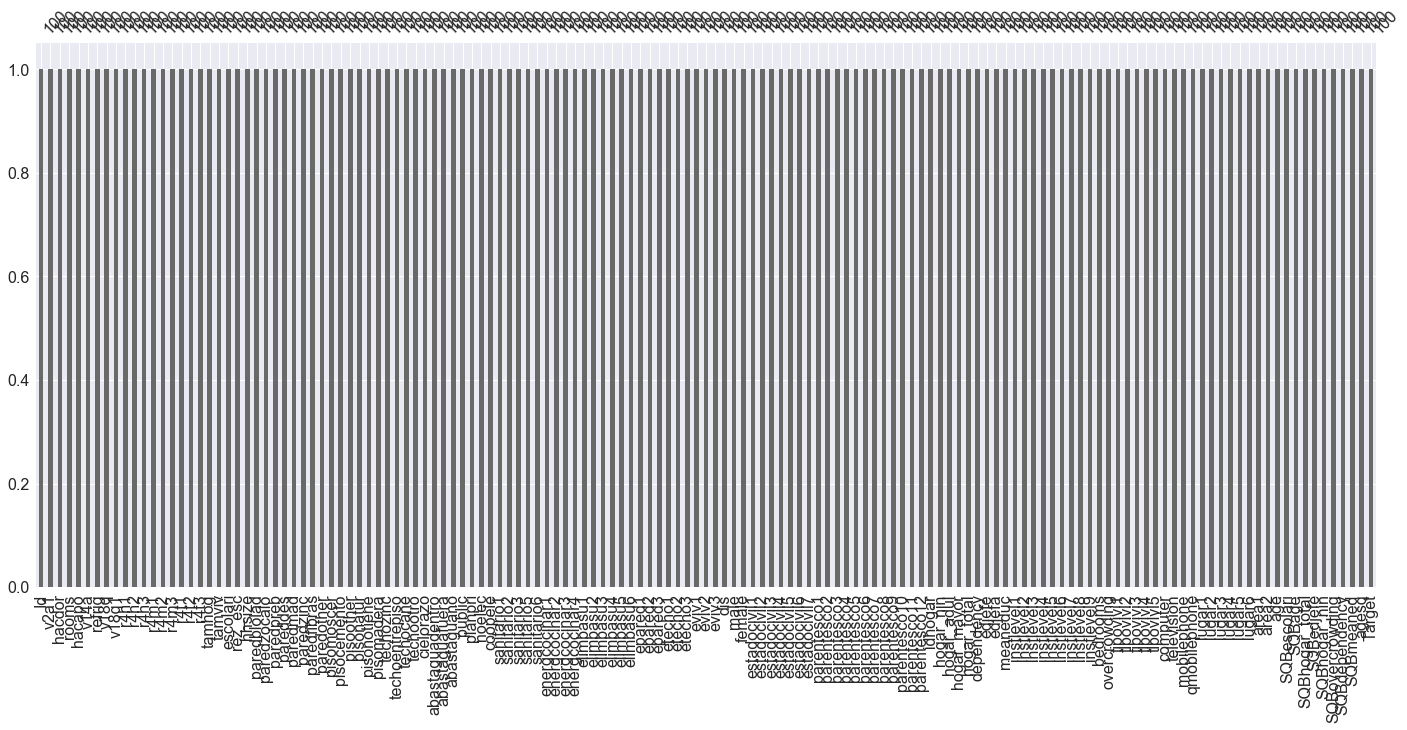

In [23]:
#Here I am just checking to make sure it all worked.
msno.bar(train_data.sample(100))

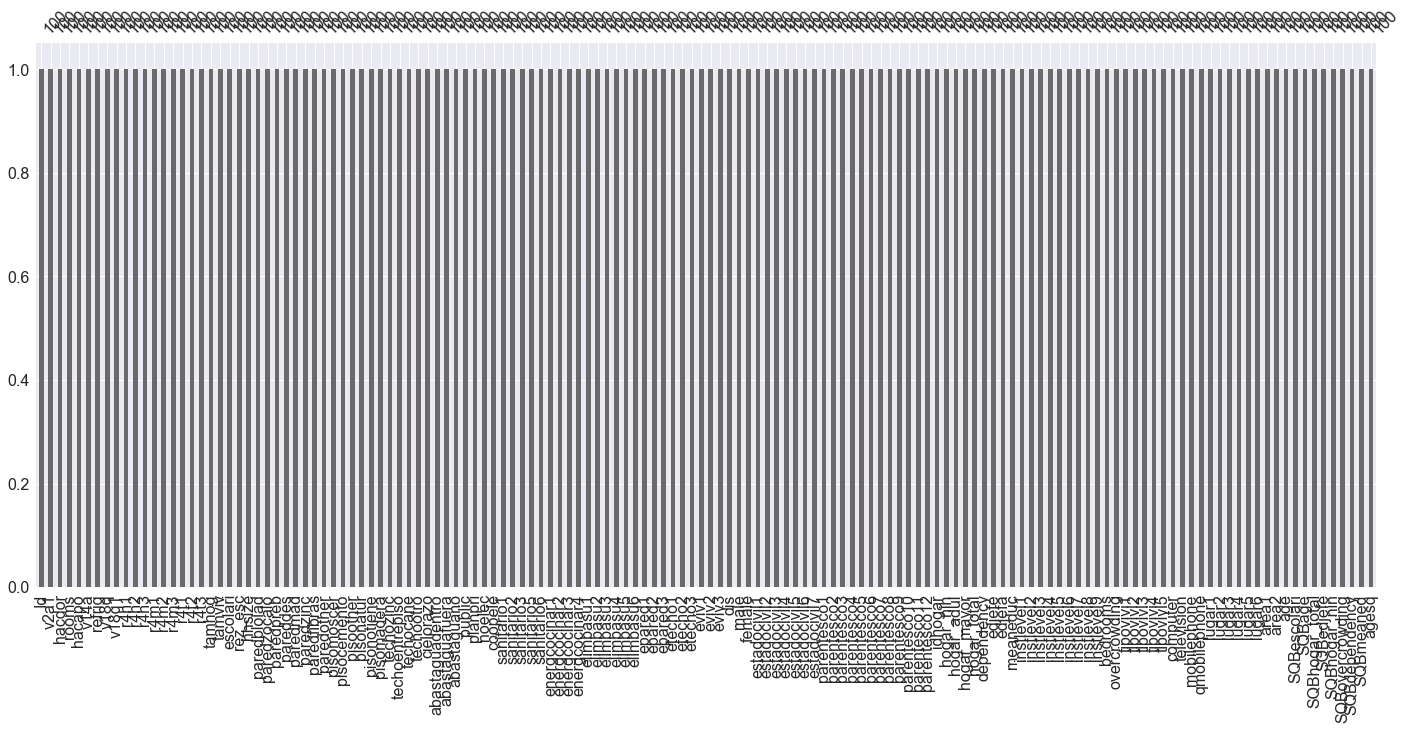

In [24]:
msno.bar(test_data.sample(100))

In [25]:
#Checking again that we have complete data
train_data.isnull().sum().sort_values(ascending = False).head()

Target         0
abastaguano    0
sanitario2     0
sanitario1     0
coopele        0
dtype: int64

In [26]:
#Checking the same for the testing data
test_data.isnull().sum().sort_values(ascending = False).head()

agesq          0
abastaguano    0
sanitario2     0
sanitario1     0
coopele        0
dtype: int64

Finished the completing section of my data cleaning.

# Creating

I will engineer a few features to make the analysis more effective.

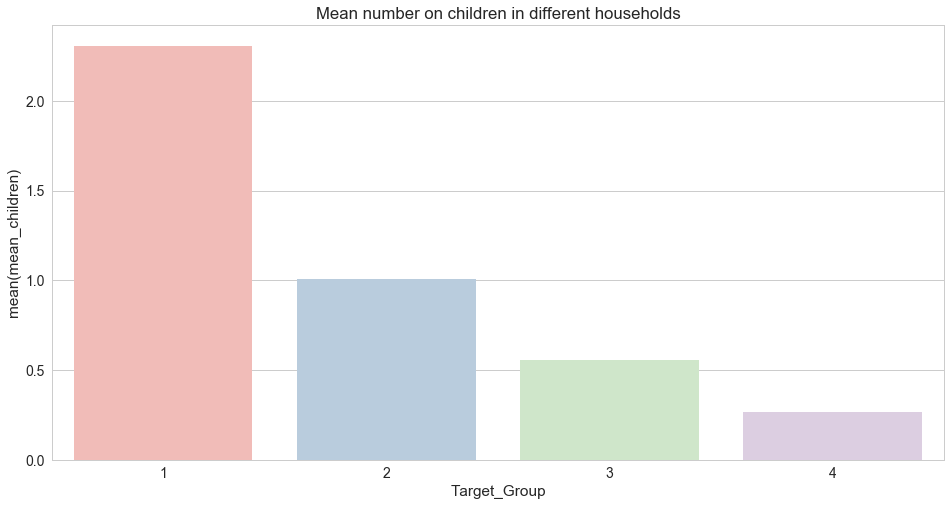

In [27]:
#Here we are creating a new feature called mean_children. This is because we have seen that children are correlated and thus if we use it as a new feature then we can improve our score.

ninos = train_data.groupby(by = 'Target')['hogar_nin', 'Target'].sum()
ninos = pd.DataFrame(ninos)

ninos['mean_children'] = (ninos['hogar_nin']/ninos['Target'])

ninos['Target_Group'] = ninos['Target'].map({4: "NonVulnerable", 3: "Moderate Poverty", 2: "Vulnerable", 1: "Extereme Poverty"})
j=0;

ninos.Target_Group = pd.to_numeric(ninos.Target_Group, errors='coerce').fillna(0).astype(np.int64)

for i in ninos['Target_Group']:
    ninos['Target_Group'].iloc[j] = j+1;
    j = j+1
    i = i+1;
    
sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x = ninos['Target_Group'] , y = 'mean_children', data = ninos, palette='Pastel1', ci = None).set_title('Mean number on children in different households')

## Now we are gonna go in and fill those ones from earlier with real data. We filled them with 0 before but now we are gonna put the median in there as a better measure to not bias our model as much as those 0's would have.

In [28]:
#Replacing data with 0 if its nan.
train_data['v2a1'].replace(0, np.nan, inplace = True)
#Filling the 0's with median values
train_data["v2a1"] = train_data.groupby("Target").transform(lambda x: x.fillna(x.median()))
rpd = pd.DataFrame([train_data['v2a1']/train_data['hogar_total'], train_data['Target']]).T
rpd['Target'] = rpd['Target'].map({4: "NonVulnerable", 3: "Moderate Poverty", 2: "Vulnerable", 1: "Extereme Poverty"})
rpd.groupby(by = 'Target').mean()

,Unnamed 0
Target,
Extereme Poverty,22950.190287
Moderate Poverty,27303.554637
NonVulnerable,53333.781743
Vulnerable,25693.910568


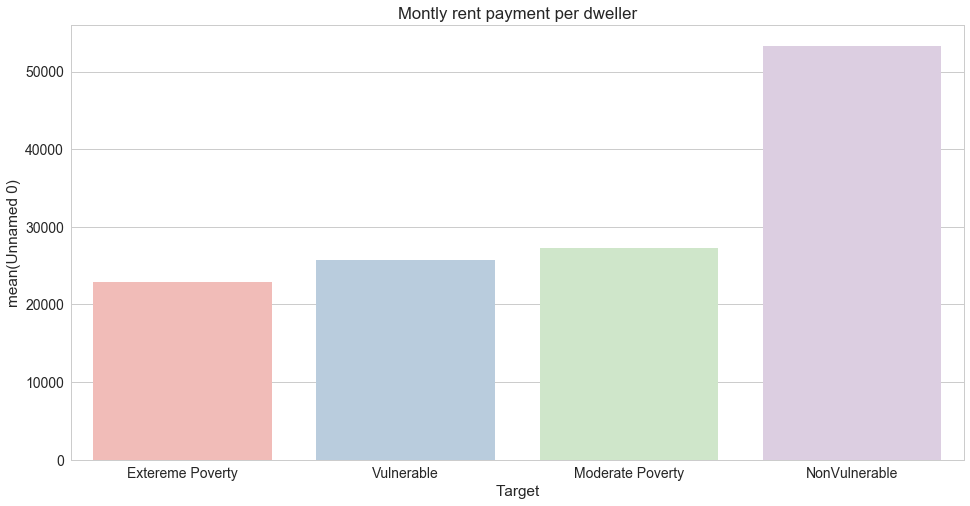

In [29]:
#Next feature we think might be good is montly rent payment per dweller in the home so we graph it to see if it will be good.
sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x = 'Target', y = 'Unnamed 0', data = rpd, palette='Pastel1',order = ["Extereme Poverty","Vulnerable","Moderate Poverty", "NonVulnerable"], ci = None).set_title('Montly rent payment per dweller')

We see slight correlation but I wouldn't say its enough to justify creating another feature so we will leave it out. 

In [30]:
#This is an array of squared variables that are unnecesary in my opinion. Due to their high levels of collinearity I think they will cause high variance in my model so I am dropping them.
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

Below you see how highly colinear they are so I am dropping them.

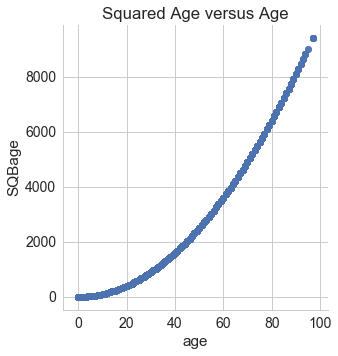

In [31]:
sns.lmplot('age', 'SQBage', data = train_data, fit_reg=False);
plt.title('Squared Age versus Age');

In [32]:
# Dropping squared variables
train_data = train_data.drop(sqr_, axis =1)
train_data.shape

(9557, 134)

Now I am done creating features and am going on to convert them all into appropriate types for modeling.

# Convert the Variables

Now I am going to convert data from "Object/String" to "Numeric" so that I can use my models on them.

In [33]:
#Here I am finding all the "object" variables
train_data.select_dtypes(include=['object']).head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


I am going to drop the ID column because it is unnecesary/repetitive and redundant

In [34]:
#dropping "ID"
train_data.drop(['Id'], axis=1, inplace=True)

Next I am going to label encode the rest of the object variables for both the training and testing data.

In [35]:
#label encoding
le = LabelEncoder()
for col in train_data.columns.values:
    if train_data[col].dtypes=='object':
        data=train_data[col].append(train_data[col])
        le.fit(data.values)
        train_data[col]=le.transform(train_data[col])

In [36]:
#label encoding
le = LabelEncoder()
for col in test_data.columns.values:
    if test_data[col].dtypes=='object':
        data=test_data[col].append(test_data[col])
        le.fit(data.values)
        test_data[col]=le.transform(test_data[col])

In [37]:
#get dummies
pd.get_dummies(train_data).head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,1,0,0,0,0,0,1,0,43,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,0,0,0,0,0,1,0,67,4
2,150000.0,0,8,0,1,1,0,0.0,0,0,...,1,0,0,0,0,0,1,0,92,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,0,0,0,0,0,1,0,17,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,0,0,0,0,0,1,0,37,4


In [38]:
#get dummies
pd.get_dummies(test_data).head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,4399,0.0,0,5,0,1,1,0,0.0,1,...,4,0,16,9,0,1,2.25,0.25,272.25000,16
1,2562,0.0,0,5,0,1,1,0,0.0,1,...,41,256,1681,9,0,1,2.25,0.25,272.25000,1681
2,21347,0.0,0,5,0,1,1,0,0.0,1,...,41,289,1681,9,0,1,2.25,0.25,272.25000,1681
3,15791,0.0,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00000,3481
4,15575,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,100.50922,324


In [39]:
#double check that all object variables were converted
train_data.select_dtypes(include=['object']).head()

""
0
1
2
3
4


In [40]:
#double check that all object variables were converted
test_data.select_dtypes(include=['object']).head()

""
0
1
2
3
4


In [41]:
#Check to see how all variables are encoded
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 133 entries, v2a1 to Target
dtypes: float64(5), int64(128)
memory usage: 9.7 MB


In [42]:
#Check to see how all variables are encoded
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(134)
memory usage: 25.8 MB


Good. All the data is converted over. Time to implement my models. 

# Modeling

Lets establish our target as "Target" (One of the 4 Groups).

In [43]:
#set target equal to "target"
target = train_data.Target

In [44]:
#Drop "Survived"
train_data.drop(['Target'], axis=1, inplace=True)

Next I will split my data into a train set and a test set.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)

In [46]:
#Check the balance of the data
pd.Series(y_train).value_counts(normalize=True)

4    0.629562
2    0.168215
3    0.124918
1    0.077305
Name: Target, dtype: float64

Now I will run my data through various classification models:
Logistic Regression,
Decision Tree with AdaBoost,
SVM,
XGB Classifier,
Random Forest

# LogisticRegression

In [47]:
logreg = linear_model.LogisticRegression()
logreg.fit(train_data, target)
sum(target == logreg.predict(train_data))

6383

The logestic regression predicted 6383 correctly out of 9557. Good start.

In [48]:
clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [49]:
print("Train acc: {}".format(accuracy_score(y_train, train_predictions)))
print("Test acc: {}".format(accuracy_score(y_test, test_predictions)))

Train acc: 0.6711576193590582
Test acc: 0.6548117154811716


65% isn't a bad score.

# DecisionTree

In [50]:
#I will use decision tree as my base model
tree_model = tree.DecisionTreeClassifier()
#Here I use AdaBoost to boost the model
clf = AdaBoostClassifier(n_estimators=100, base_estimator=tree_model, learning_rate=1)
#fit the model
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [51]:
#run it through the test portion of the split data
y_predict = clf.predict(X_test)

In [52]:
#print accuracy
accuracy_score(y_test, y_predict)

0.96234309623430958

95% percent our top performer so far. 

# SVM

In [53]:
#write up the SVM
clf = SVC(max_iter=1)
#Gridsearch
gridsearch = GridSearchCV(clf, {"C": [0.2, 0.5, 0.7], "kernel": ['linear', 'poly', 'rbf'], 
                                'degree': [1, 2, 3], 'gamma': [1, 5, 11]}, scoring='accuracy')
#fit the data
gridsearch.fit(X_train, y_train)
#print the best parameters and accuracy
print("Best Params: {}".format(gridsearch.best_params_))
print("Test Accuracy: {}".format(accuracy_score(y_test, gridsearch.predict(X_test))))

Best Params: {'C': 0.2, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy: 0.6202928870292888


With an accuracy of 62% I wouldn't use SVM on the test data.

# XGBClassifier

In [54]:
#XGBoost
xclas = XGBClassifier() 
#Fit the model
xclas.fit(X_train, y_train)  
the_answer = xclas.predict(X_test)
#Print Accuracy
print('Test Accuracy: {}'.format(accuracy_score(y_test, xclas.predict(X_test))))

Test Accuracy: 0.8760460251046025


87% accuracy is respectable, not too bad. Its better than some models.

# Random Forest

In [55]:
random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
accuracy_score(y_test, Y_pred)

KeyboardInterrupt: 

96% accuracy makes Random Forest our best predicting model. 

# Model Scores

1. Logistic Regression_____66%
2. Decision Tree with Adaboost___________95.50%
3. SVM_____________________62%
4. XGB Classifier_________ 87%
5. Random Forest__________ 96.6%

From every one of our models, the best performing were Random Forest, Decision Tree and XGB Classifier, in that order. Given my high score with some of my models I am hesitant to say that they are great. They might be prone to overfitting due to the amount of variables that are highly correlated. 96 percent is really good though and with better feature engineering I think I could improve that further.

# Done With Training

# Now I will apply my analysis to the test data

In [ ]:
#preview Data
test_data.info()
test_data.head()

In [ ]:
#Describe data
test_data.describe()

# Completing

Due to my earlier manipulations, I already have clean data for the test data. I cleaned and completed the training and testing data earlier because they were missing similar data.

Below we will check to make sure our test data are all looking mean and clean.

In [ ]:
#Visualizing the missing data. We are hoping to see 0 missing values in the following table and full bars in the chart.
msno.bar(test_data.sample(100))
#finding the features with "NaN" values
test_data.isnull().sum()

Next we will assign our test IDs to the test data column "ID".

In [ ]:
#Assign Test IDs 
test_ids = test_data["Id"]
test_data.info()

In [ ]:
#Apply the trained model to the test score
#Y_pred = random_forest.predict(test_data)

#random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(test_data)

In [ ]:
test_data.info()

In [ ]:
#show score
print(Y_pred)

In [ ]:
my_submission = pd.DataFrame({'Id': test_ids, 'Target': Y_pred})

my_submission.to_csv('submission.csv2', index=False)